In [1]:
import numpy as np
from numpy.fft import fft
import scipy
from scipy import signal

import matplotlib.pyplot as plt
from juhalib import stuffr

In [2]:
z = scipy.fromfile('../data/IQREC-02-03-19-13h50m43s310.iq', dtype=np.int16)
z = z[0:len(z)-1:2] + 1.0j * z[1:len(z):2]
z = z[0:int(50e6 * 0.5)]

In [3]:


S = stuffr.spectrogram(z, 8192)
S = stuffr.medianEqualize(S)

sr = 50e6 / 500
cr = 100166.14948319287

raw = np.transpose(stuffr.comprz_dB(S[:, ::-1]))
# freq = np.linspace(0, (len(z) / sr) * cr, num=S.shape[0]) / 1e6
# vrange = np.linspace(3e8 * (-(sr / 2)) / cr, 3e8 * (sr / 2.0) / cr, num=S.shape[1]) / 1e3
# plt.pcolormesh(freq, vrange, np.transpose(stuffr.comprz_dB(S[:, ::-1]))[0:int(S.shape[1]),:], cmap="jet", vmin=-1.0)

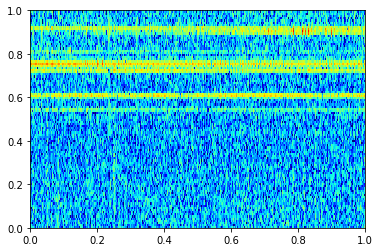

In [17]:
sfrac = .75
wid = 0.0125

start = int(S.shape[1] * sfrac)
stop = int(S.shape[1] * (sfrac + wid))

rep = np.transpose(stuffr.comprz_dB(S[:, ::-1]))[start:stop,:]

plt.pcolormesh(np.linspace(0, 1, rep.shape[1]), np.linspace(0, 1, rep.shape[0]), raw[start:stop,:], cmap="jet", vmin=-1.0)